### Setting up the google colab (optional)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy
!pip install pandas
!pip install scanpy
!pip install scanpy.external
!pip install harmonypy
!pip install seaborn
!pip install mudata
!pip install muon
!pip install mudatasets

ERROR: Could not find a version that satisfies the requirement scanpy.external (from versions: none)
ERROR: No matching distribution found for scanpy.external


### Importing modules and settings

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy as hm
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import mudata as md
import muon as mu
import mudatasets as mds
import os

In [ ]:
from matplotlib.pyplot import rc_context

General settings of Scanpy

In [ ]:
sc.settings.verbosity = 4
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, transparent = True, format = 'pdf', vector_friendly = True)

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10


### Declaring the input and output files

In [ ]:
name_of_analysis = '20230704_hydractinia_atlas_labelled_with_and_no_multimappers_ratio'

In [ ]:
results_file = '$PATH/hydractinia/matrices_and_seurat/20230703_genome_2.1_no_multimappers/20230704_hydractinia_atlas_labelled_with_and_no_multimappers_ratio.h5mu/'+name_of_analysis+'.h5mu'

In [ ]:
#with multimappers
adata_w= sc.read_h5ad('$PATH/hydractinia/matrices_and_seurat/20230703_genome_2.1_with_multimappers/hydractinia_atlas_genome_2.1_with_multimappers.h5ad')

In [ ]:
#no multimappers
adata_n= sc.read_h5ad('$PATH/hydractinia/matrices_and_seurat/20230703_genome_2.1_no_multimappers/hydractinia_atlas_genome_2.1_no_multimappers.h5ad')

In [ ]:
adata_w.var

""
LOC130612030
LOC130612031
LOC130612032
LOC130612033
LOC130612034
...
Trnay-gua_152
Trnay-gua_17
Trnay-gua_247
Trnay-gua_466


In [ ]:
adata_w

In [ ]:
adata_n.var

""
LOC130612030
LOC130612032
LOC130612033
LOC130612034
LOC130612035
...
Trnaw-cca_167
Trnay-gua_152
Trnay-gua_17
Trnay-gua_247


In [ ]:
adata_n

normalizing counts per cell
    finished (0:00:00)


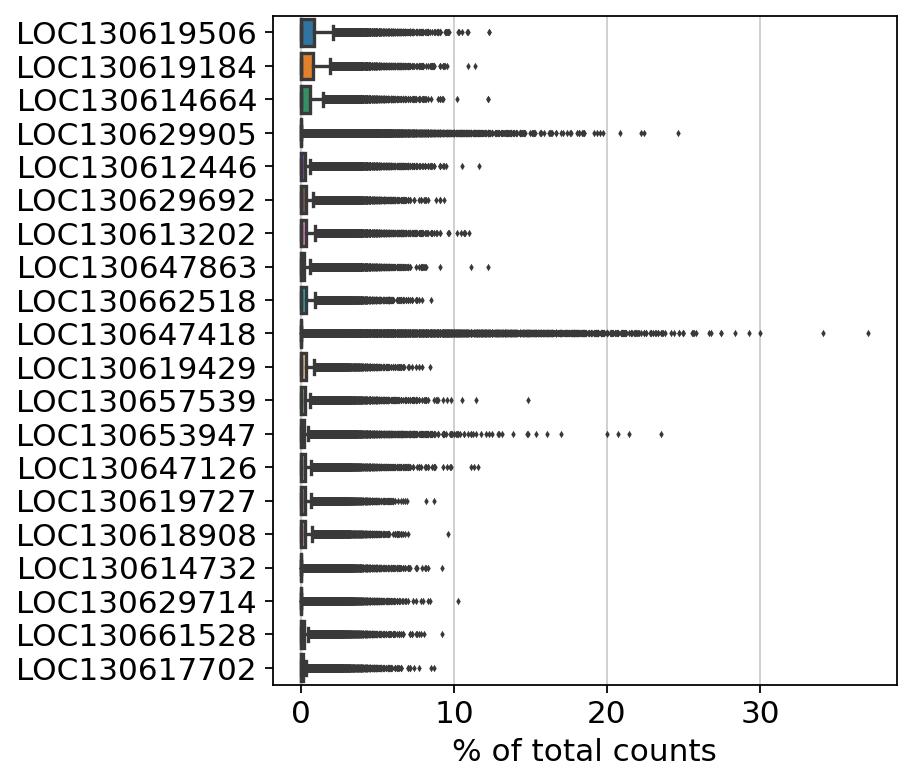

normalizing counts per cell
    finished (0:00:00)


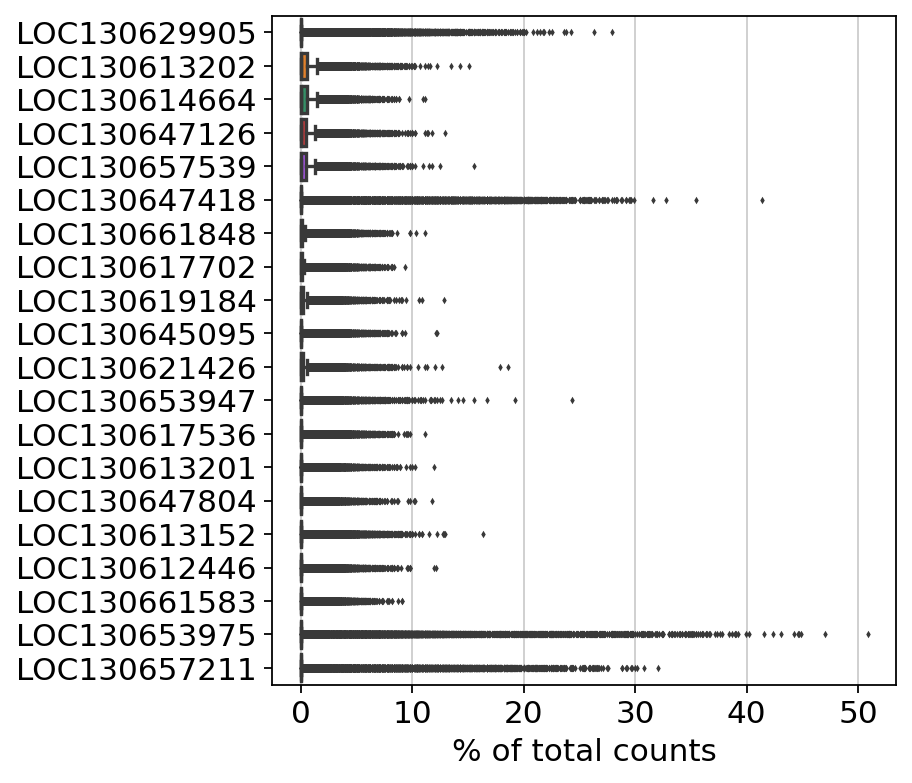

In [ ]:
sc.pl.highest_expr_genes(adata_w, n_top=20, save = False)
sc.pl.highest_expr_genes(adata_n, n_top=20, save = False)

In [ ]:
sc.pp.normalize_total(adata_w, target_sum=1e4)
sc.pp.normalize_total(adata_n, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [ ]:
sc.pp.log1p(adata_w)
sc.pp.log1p(adata_n)

In [ ]:
adata_w.var['mt'] = adata_w.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_w, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_n.var['mt'] = adata_n.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_n, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/mnt/sda/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(**kwargs)


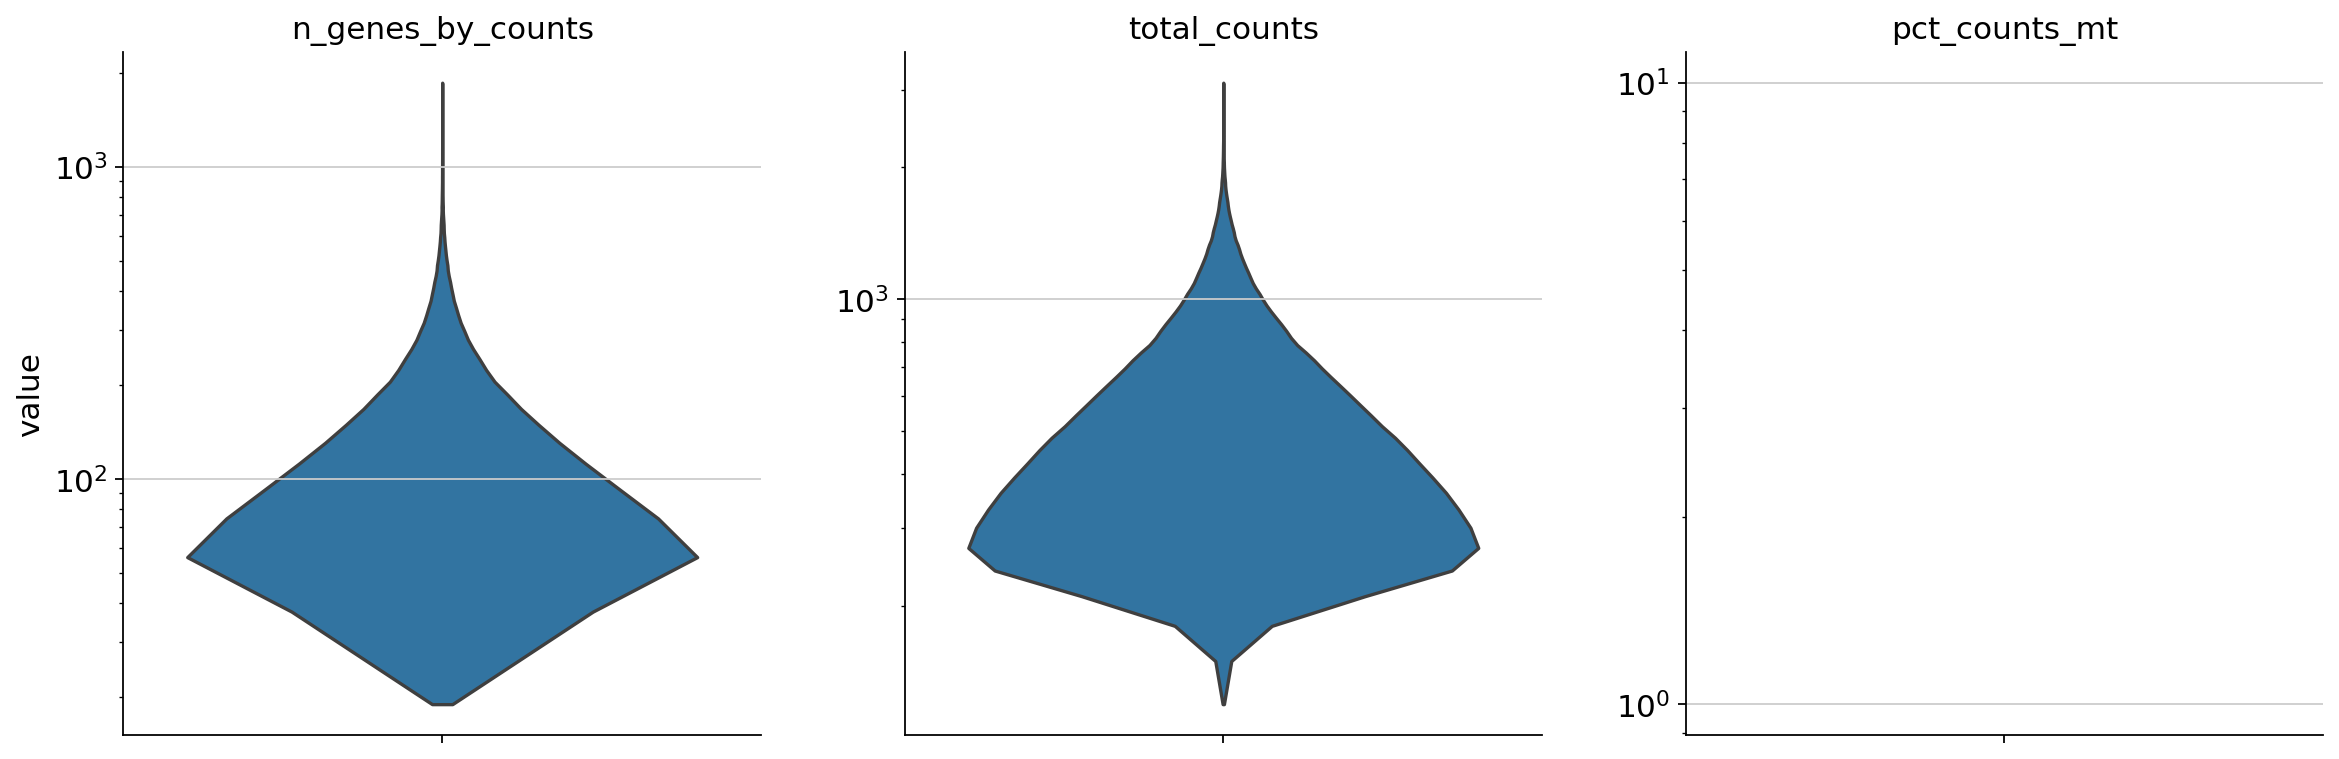

/mnt/sda/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(**kwargs)


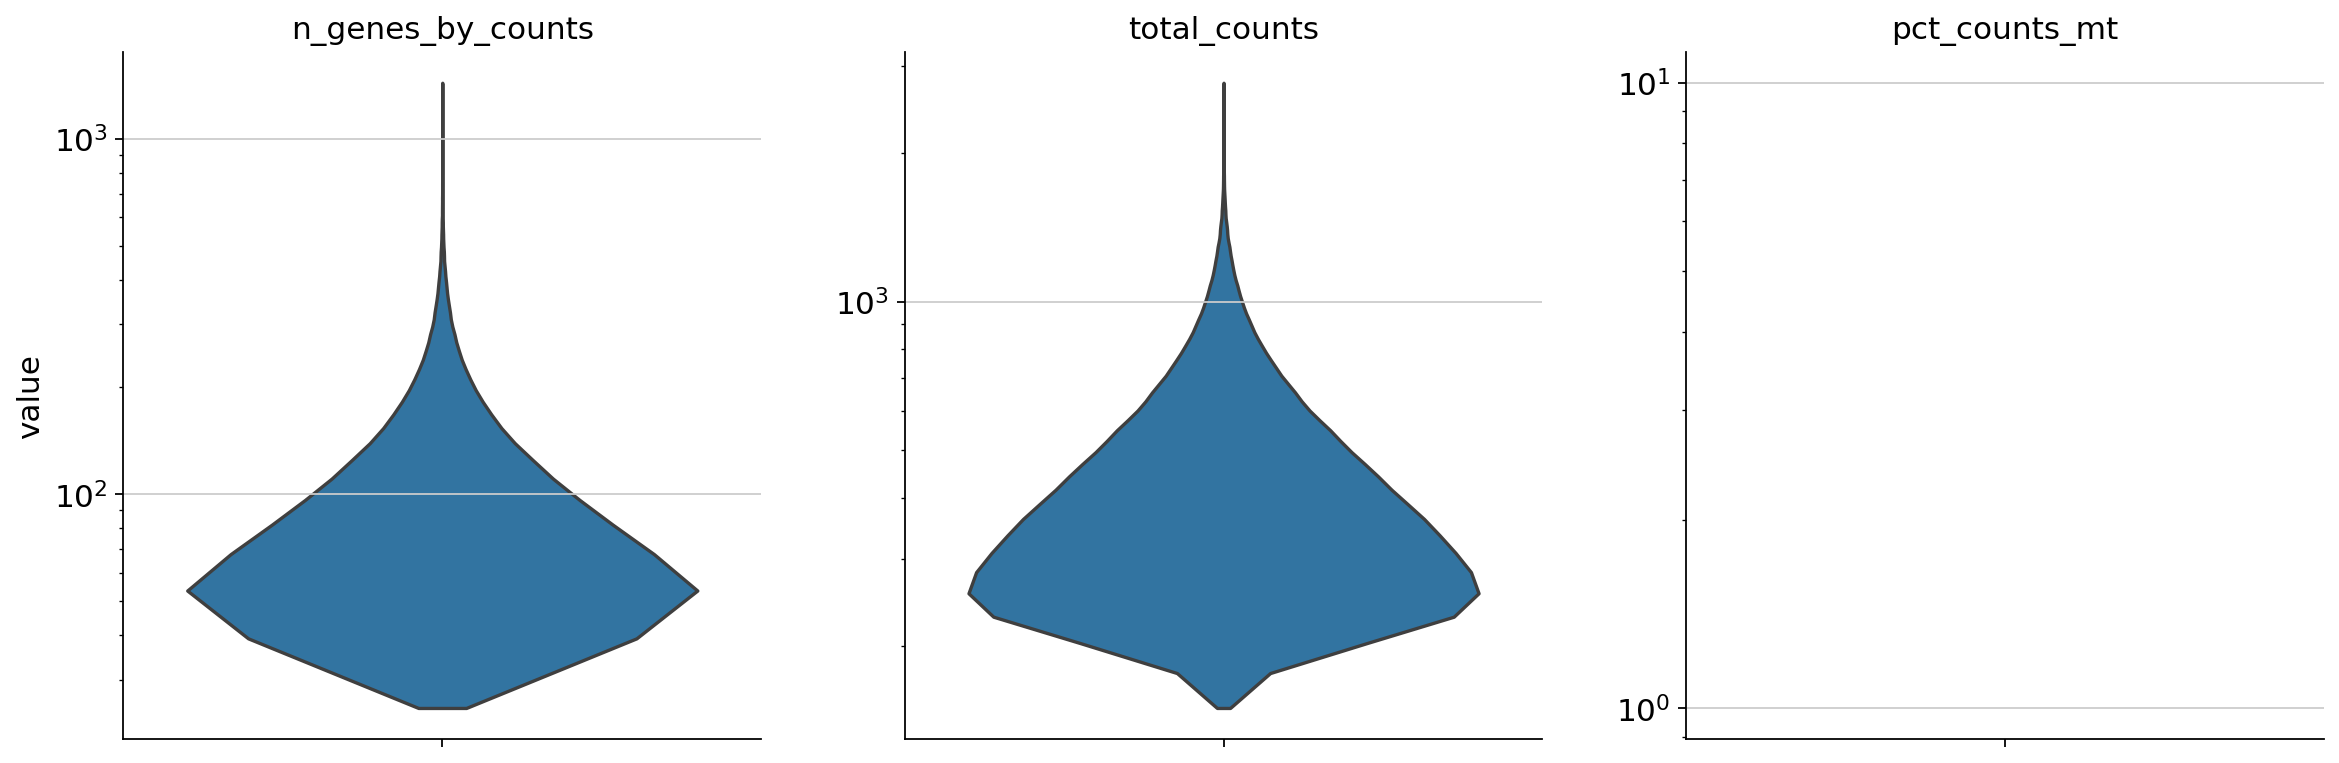

In [ ]:
sc.pl.violin(adata_w, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter= 0.5, multi_panel=True, log = True, save = False, stripplot=False)
sc.pl.violin(adata_n, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter= 0.5, multi_panel=True, log = True, save = False, stripplot=False)

In [ ]:
sc.pp.scale(adata_w, zero_center=False)
sc.pp.scale(adata_n, zero_center=False)

In [ ]:
adata_w.var

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
LOC130612030,False,11,0.000152,99.996036,42.266495,0.000152,0.024524
LOC130612031,False,1,0.000014,99.999640,3.782335,0.000014,0.007180
LOC130612032,False,938,0.012045,99.662017,3342.736328,0.012045,0.212371
LOC130612033,False,233,0.003324,99.916045,922.447021,0.003324,0.117333
LOC130612034,False,380,0.005152,99.863077,1429.793579,0.005152,0.142476
...,...,...,...,...,...,...,...
Trnay-gua_152,False,5,0.000067,99.998198,18.632490,0.000067,0.016319
Trnay-gua_17,False,3,0.000040,99.998919,11.123682,0.000040,0.012444
Trnay-gua_247,False,1,0.000012,99.999640,3.302408,0.000012,0.006269
Trnay-gua_466,False,1,0.000017,99.999640,4.686998,0.000017,0.008897


In [ ]:
adata_n.var

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
LOC130612030,False,10,0.000178,99.995856,42.913193,0.000178,0.027874
LOC130612032,False,869,0.013984,99.639927,3374.809814,0.013984,0.237919
LOC130612033,False,145,0.002656,99.939919,641.015747,0.002656,0.109826
LOC130612034,False,212,0.003571,99.912157,861.940430,0.003571,0.122761
LOC130612035,False,551,0.009567,99.771691,2308.986328,0.009567,0.203046
...,...,...,...,...,...,...,...
Trnaw-cca_167,False,1,0.000020,99.999586,4.848762,0.000020,0.009870
Trnay-gua_152,False,5,0.000081,99.997928,19.629787,0.000081,0.018234
Trnay-gua_17,False,2,0.000034,99.999171,8.145263,0.000034,0.011979
Trnay-gua_247,False,1,0.000015,99.999586,3.532886,0.000015,0.007191


In [ ]:
adata_n

In [ ]:
adata_w

In [ ]:
with_genecounts= pd.DataFrame(np.array(adata_w.X.sum(axis = 0))[0,:], index = adata_w.var.index).astype(int)
no_genecounts= pd.DataFrame(np.array(adata_n.X.sum(axis = 0))[0,:], index = adata_n.var.index).astype(int)

In [ ]:
with_genecounts

,0
LOC130612030,1723
LOC130612031,526
LOC130612032,15740
LOC130612033,7861
LOC130612034,10035
...,...
Trnay-gua_152,1141
Trnay-gua_17,893
Trnay-gua_247,526
Trnay-gua_466,526


In [ ]:
no_genecounts

,0
LOC130612030,1539
LOC130612032,14184
LOC130612033,5836
LOC130612034,7021
LOC130612035,11371
...,...
Trnaw-cca_167,491
Trnay-gua_152,1076
Trnay-gua_17,679
Trnay-gua_247,491


In [ ]:
counts= pd.merge(with_genecounts, no_genecounts, right_index= True, left_index= True,how= 'left')

In [ ]:
counts = counts.fillna(0)

In [ ]:
counts.columns

Index(['0_x', '0_y'], dtype='object')

In [ ]:
counts.rename(columns= {'0_x':'with_multimappers','0_y':'no_multimappers'}, inplace=True)

In [ ]:
counts['substraction'] = counts['with_multimappers'] - counts['no_multimappers']

#### How many genes with multimappers have the same counts as without multimappers

In [ ]:
counts['no_multimappers'] == counts['with_multimappers']

LOC130612030     False
LOC130612031     False
LOC130612032     False
LOC130612033     False
LOC130612034     False
                 ...  
Trnay-gua_152    False
Trnay-gua_17     False
Trnay-gua_247    False
Trnay-gua_466    False
Trnay-gua_470    False
Length: 23126, dtype: bool

In [ ]:
counts['matching'] =counts.apply(lambda x: x.with_multimappers == x.no_multimappers, axis=1).astype(int)

In [ ]:
counts['no_multimappers'] == 0

LOC130612030     False
LOC130612031      True
LOC130612032     False
LOC130612033     False
LOC130612034     False
                 ...  
Trnay-gua_152    False
Trnay-gua_17     False
Trnay-gua_247    False
Trnay-gua_466     True
Trnay-gua_470    False
Name: no_multimappers, Length: 23126, dtype: bool

In [ ]:
counts['ratio'] = counts['with_multimappers']/counts['no_multimappers']

In [ ]:
counts['ratio'].replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
counts

,with_multimappers,no_multimappers,substraction,matching,ratio
LOC130612030,1723,1539.0,184.0,0,1.119558
LOC130612031,526,0.0,526.0,0,0.000000
LOC130612032,15740,14184.0,1556.0,0,1.109701
LOC130612033,7861,5836.0,2025.0,0,1.346984
LOC130612034,10035,7021.0,3014.0,0,1.429284
...,...,...,...,...,...
Trnay-gua_152,1141,1076.0,65.0,0,1.060409
Trnay-gua_17,893,679.0,214.0,0,1.315169
Trnay-gua_247,526,491.0,35.0,0,1.071283
Trnay-gua_466,526,0.0,526.0,0,0.000000


In [ ]:
#count of number of genes which do not appear in without multimappers
(counts['no_multimappers'] == 0).sum()

1182

In [ ]:
#to know which genes are counted in the multimapping and nowhere else
gene_zero_counts = counts['no_multimappers'][counts['no_multimappers'] == 0].index
gene_zero_counts

Index(['LOC130612031', 'LOC130612074', 'LOC130612088', 'LOC130612096',
       'LOC130612134', 'LOC130612161', 'LOC130612182', 'LOC130612185',
       'LOC130612237', 'LOC130612299',
       ...
       'Trnav-uac_44', 'Trnav-uac_478', 'Trnaw-cca_111', 'Trnaw-cca_144',
       'Trnaw-cca_145', 'Trnaw-cca_204', 'Trnaw-cca_216', 'Trnaw-cca_284',
       'Trnaw-cca_305', 'Trnay-gua_466'],
      dtype='object', length=1182)

In [ ]:
counts.head(40)

,with_multimappers,no_multimappers,substraction,matching,ratio
LOC130612030,1723,1539.0,184.0,0,1.119558
LOC130612031,526,0.0,526.0,0,0.000000
LOC130612032,15740,14184.0,1556.0,0,1.109701
LOC130612033,7861,5836.0,2025.0,0,1.346984
LOC130612034,10035,7021.0,3014.0,0,1.429284
LOC130612035,16243,11371.0,4872.0,0,1.428458
LOC130612036,67548,58969.0,8579.0,0,1.145483
LOC130612037,10653,6883.0,3770.0,0,1.547726
LOC130612038,13038,11781.0,1257.0,0,1.106697
LOC130612039,1984,491.0,1493.0,0,4.040733


In [ ]:
counts['ratio'].min()

0.0

In [ ]:
counts.to_csv('$PATH/hydractinia/matrices_and_seurat/20230703_genome_2.1_no_multimappers/gene_count_per_mapping.csv',index= True)

The following scatterplots illustrate the ratio of counts each gene receives in each modality of mapping (allowing up to 1 alignment vs. allowing up to 200 alignments for each read)

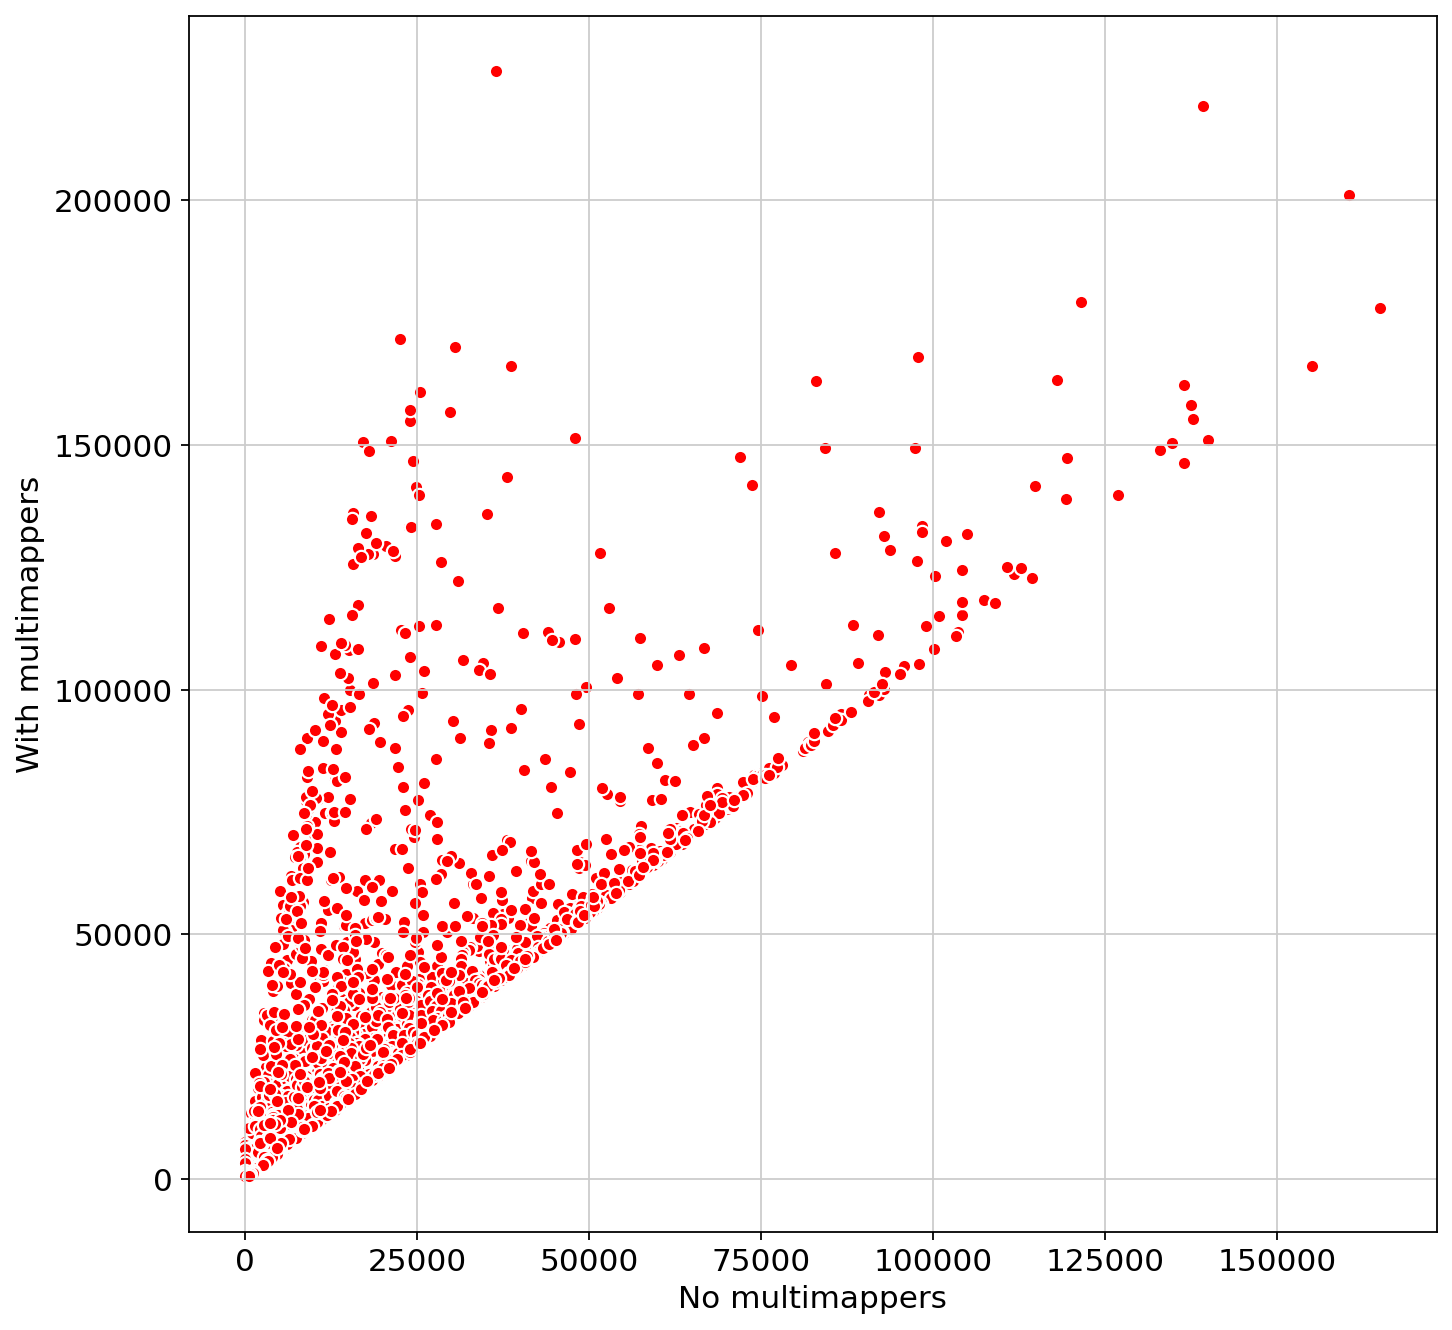

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(counts['no_multimappers'], counts['with_multimappers'], c='red', edgecolors='white')
plt.xlabel('No multimappers')
plt.ylabel('With multimappers')
plt.show()

In [ ]:
lcounts= np.log(counts)

/mnt/sda/david/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


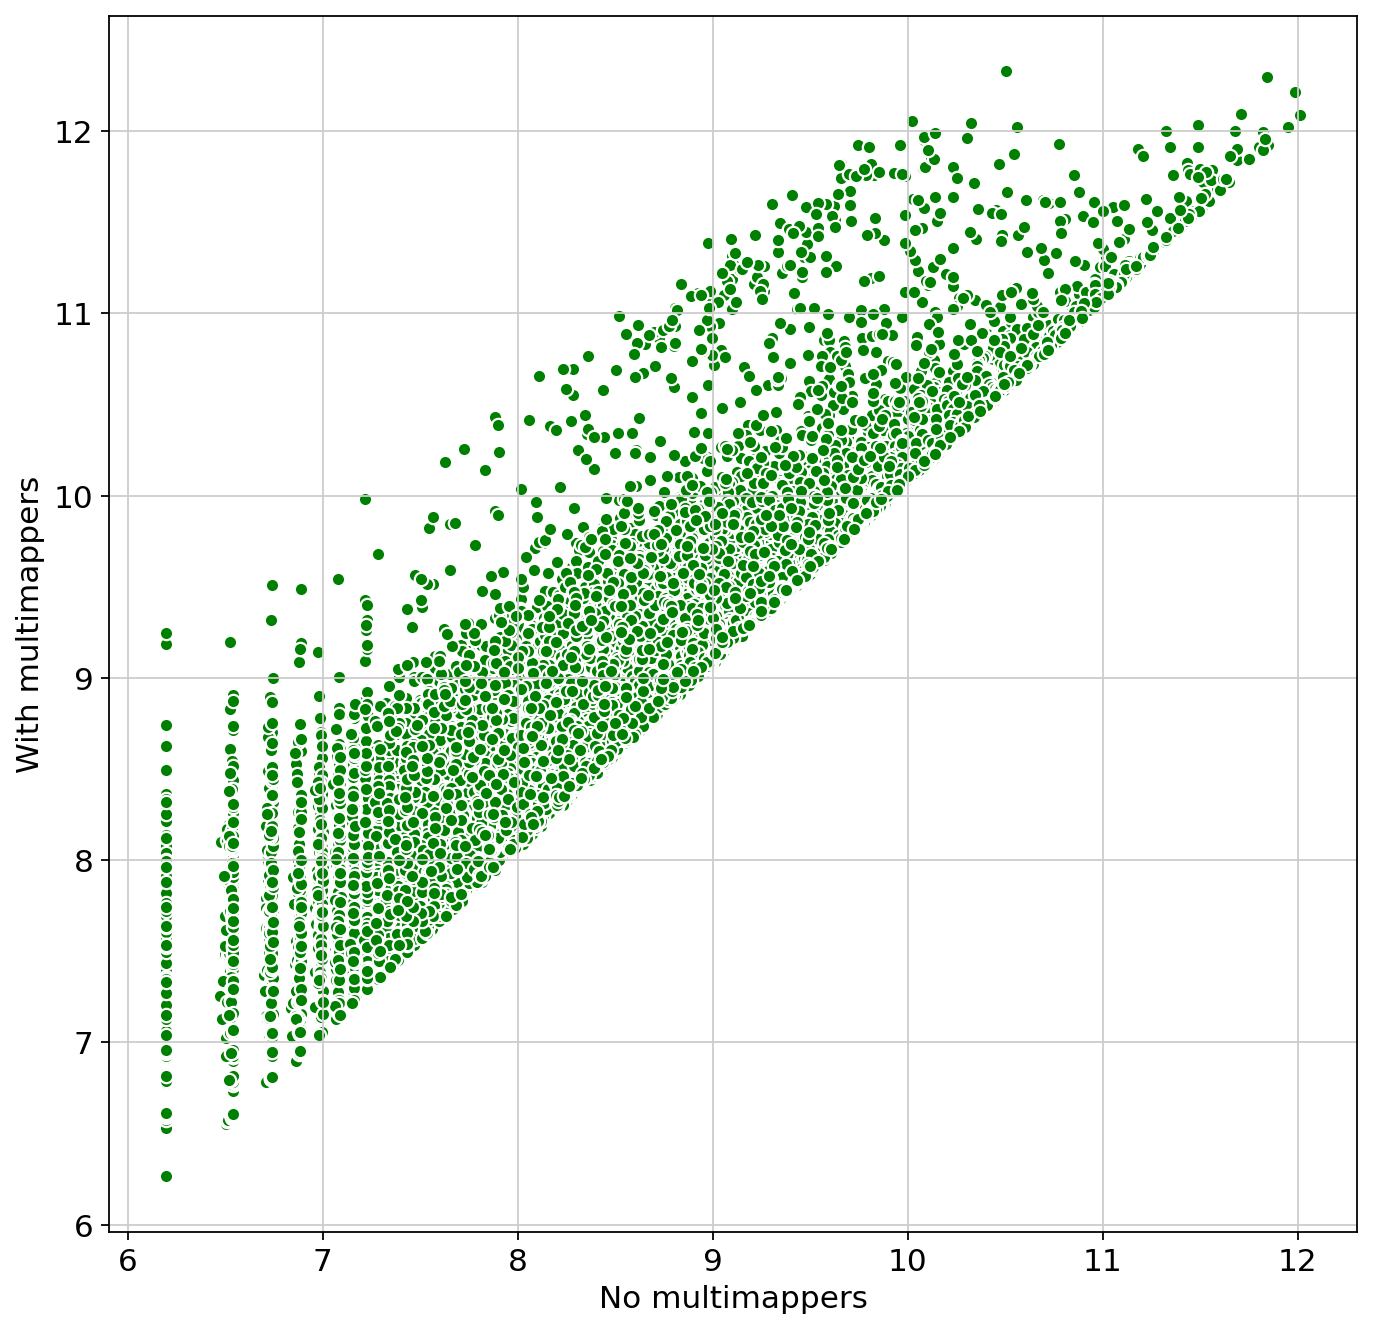

In [ ]:
#logarithmic transformation of the data points
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(lcounts['no_multimappers'], lcounts['with_multimappers'], c='green', edgecolors='white')
plt.xlabel('No multimappers')
plt.ylabel('With multimappers')
plt.show()

In [ ]:
counts['ratio'].describe()

count    23126.000000
mean         1.502403
std          1.065972
min          0.000000
25%          1.105086
50%          1.164222
75%          1.513437
max         21.054990
Name: ratio, dtype: float64

### Before transfering the ratios to adata.var be sure to reload the raw matrix to save it the most "unprocessed" possible

In [ ]:
adata_n.raw = adata_n

In [ ]:
adata_n_raw = adata_n.raw.to_adata()

In [ ]:
adata_n.var_names

Index(['LOC130612030', 'LOC130612032', 'LOC130612033', 'LOC130612034',
       'LOC130612035', 'LOC130612036', 'LOC130612037', 'LOC130612038',
       'LOC130612039', 'LOC130612040',
       ...
       'Trnav-cac_103', 'Trnav-cac_24', 'Trnav-gac', 'Trnav-uac_376',
       'Trnaw-cca_146', 'Trnaw-cca_167', 'Trnay-gua_152', 'Trnay-gua_17',
       'Trnay-gua_247', 'Trnay-gua_470'],
      dtype='object', length=21944)

In [ ]:
adata_n_raw.var['ratio_with_no'] = counts['ratio']

In [ ]:
adata_n.var['ratio_with_no'] = counts['ratio']

In [ ]:
adata_n.raw.var['ratio_with_no']= adata_n_raw.var['ratio_with_no']

In [ ]:
adata_n.raw.var

,ratio_with_no
LOC130612030,1.119558
LOC130612032,1.109701
LOC130612033,1.346984
LOC130612034,1.429284
LOC130612035,1.428458
...,...
Trnaw-cca_167,1.071283
Trnay-gua_152,1.060409
Trnay-gua_17,1.315169
Trnay-gua_247,1.071283


In [ ]:
adata_n_raw.var.sort_values(by='ratio_with_no', ascending= False).head(30)#sort and see the top 30 with higher ratios

,ratio_with_no
LOC130661196,21.054990
LOC130655368,19.867617
LOC130617889,15.911348
LOC130655199,15.852747
LOC130657246,14.480234
LOC130613045,13.500511
LOC130617129,13.190024
LOC130657127,12.903902
LOC130618985,12.785865
LOC130614069,12.762048


### Doing the same ratio indexing in adata.var in the version with multimappers

In [ ]:
adata_w.raw = adata_w
adata_w_raw = adata_w.raw.to_adata()
adata_w_raw.var['ratio_with_no'] = counts['ratio']
adata_w.var['ratio_with_no'] = counts['ratio']
adata_w.raw.var['ratio_with_no']= adata_w_raw.var['ratio_with_no']

In [ ]:
adata_w.var

,ratio_with_no
LOC130612030,1.119558
LOC130612031,0.000000
LOC130612032,1.109701
LOC130612033,1.346984
LOC130612034,1.429284
...,...
Trnay-gua_152,1.060409
Trnay-gua_17,1.315169
Trnay-gua_247,1.071283
Trnay-gua_466,0.000000


## Merging the two matrices in one through different layers with the muon package

In [ ]:
adata_n

In [ ]:
adata_w

In [ ]:
mdata = md.MuData({'with':adata_w, 'no':adata_n})

In [ ]:
mdata

In [ ]:
list(mdata.mod.keys())

['with', 'no']

In [ ]:
print(mdata.mod["with"])
print(mdata.mod["no"])

In [ ]:
print(mdata.shape)
print(mdata.n_obs)
print(mdata.n_vars)

(277529, 45070)
277529
45070


In [ ]:
adata_n.var_names

Index(['LOC130612030', 'LOC130612032', 'LOC130612033', 'LOC130612034',
       'LOC130612035', 'LOC130612036', 'LOC130612037', 'LOC130612038',
       'LOC130612039', 'LOC130612040',
       ...
       'Trnav-cac_103', 'Trnav-cac_24', 'Trnav-gac', 'Trnav-uac_376',
       'Trnaw-cca_146', 'Trnaw-cca_167', 'Trnay-gua_152', 'Trnay-gua_17',
       'Trnay-gua_247', 'Trnay-gua_470'],
      dtype='object', length=21944)

In [ ]:
mdata.var_names

Index(['LOC130612030', 'LOC130612031', 'LOC130612032', 'LOC130612033',
       'LOC130612034', 'LOC130612035', 'LOC130612036', 'LOC130612037',
       'LOC130612038', 'LOC130612039',
       ...
       'Trnav-cac_103', 'Trnav-cac_24', 'Trnav-gac', 'Trnav-uac_376',
       'Trnaw-cca_146', 'Trnaw-cca_167', 'Trnay-gua_152', 'Trnay-gua_17',
       'Trnay-gua_247', 'Trnay-gua_470'],
      dtype='object', length=45070)

## Writing and reading in a similar way to h5ad type

In [ ]:
mdata.write(results_file)

/mnt/sda/david/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
